# Jelfeldolgozás gyakorlat
# 1. feladatsor
## 2018. szeptember 17.

## Task 1
### Mirrorring a vector on an manifold with $\underline{n}$ normal
Let $\underline{v}$ a vector to reflect. Here is how to write the reflection matrix $\matrix{R}$ using the Householder transformation:

$$
\matrix{R} = \matrix{I} - 2 \left( \underline{n} \otimes \underline{n}^{T} \right)
$$

Where $\underline{n}$ is the normal (unit) vector of the subspace.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

##### Please enter the rank of the system!

In [5]:
Rank_f1 = int(input("Choosen rank: "))

Choosen rank: 6


##### Please enter the elements of the $\underline{v}$ vector!

In [6]:
v_f1 = np.empty(Rank_f1)

for i in range(0,Rank_f1):
    v_f1[i] = float(input("v vector's element of index #" + str(i+1) + ": ") or "0")

v vector's element of index #1: 4
v vector's element of index #2: -1
v vector's element of index #3: 7
v vector's element of index #4: 54
v vector's element of index #5: -2
v vector's element of index #6: 6


In [7]:
print("Created v vector: ", v_f1)

Created v vector:  [ 4. -1.  7. 54. -2.  6.]


##### Please enter the elements of the $\underline{n}$ vector!

In [8]:
n_f1 = np.empty(Rank_f1)

for i in range(0,Rank_f1):
    n_f1[i] = float(input("n vector's element of index #" + str(i+1) + ": ") or "0")

n vector's element of index #1: 9
n vector's element of index #2: -1
n vector's element of index #3: 3
n vector's element of index #4: -4
n vector's element of index #5: -1
n vector's element of index #6: -7


In [9]:
# Normalize the vector, creating an N unit vector
n_norm_f1 = n_f1/np.linalg.norm(n_f1)

print("Created (normalized) N vector: ", n_norm_f1)

Created (normalized) N vector:  [ 0.7182782  -0.07980869  0.23942607 -0.31923475 -0.07980869 -0.55866082]


##### Create Identity matrix

In [10]:
I_f1 = np.eye(Rank_f1)

print("Created Identity matrix: \n", I_f1)

Created Identity matrix: 
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


##### Compose Reflection matrix

In [11]:
Ref_f1 = I_f1 - 2*(np.outer(n_norm_f1,n_norm_f1.T))

print("Created Reflection matrix: \n", Ref_f1)

Created Reflection matrix: 
 [[-0.03184713  0.11464968 -0.34394904  0.45859873  0.11464968  0.80254777]
 [ 0.11464968  0.98726115  0.03821656 -0.05095541 -0.01273885 -0.08917197]
 [-0.34394904  0.03821656  0.88535032  0.15286624  0.03821656  0.26751592]
 [ 0.45859873 -0.05095541  0.15286624  0.79617834 -0.05095541 -0.3566879 ]
 [ 0.11464968 -0.01273885  0.03821656 -0.05095541  0.98726115 -0.08917197]
 [ 0.80254777 -0.08917197  0.26751592 -0.3566879  -0.08917197  0.37579618]]


##### Reflect $\underline{v}$ vector with the $\matrix{R}$ matrix on manifold with $\underline{n}$ normal component

In [12]:
V_reflected_f1 = Ref_f1@v_f1

print("Reflected vector: ", V_reflected_f1)

Reflected vector:  [ 26.70063694  -3.52229299  14.56687898  43.91082803  -4.52229299
 -11.65605096]


#### Conditions

Reflection matrix should be:
- Hermitian: $R = R^{+}$
- Unitary: $R^{-1} = R^{+}$
- Involutory: $R^{2} = I$
- $det(R) = -1$ (Householder matrix)

Test these conditions!

In [13]:
# Hermitian?
if(np.linalg.det(np.around((Ref_f1.conj().T - Ref_f1), 8)) == 0):
    print("R is Hermitian!\nR^+ - R:\n", np.around((Ref_f1.conj().T - Ref_f1), 8))
else:
    print("R is not Hermitian!\nR^+ - R:\n", np.around((Ref_f1.conj().T - Ref_f1), 8))    
print("\n")

# Unitary?
if(np.linalg.det(np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8)) == 0):
    print("R is unitary!\nR^+ - R^-1:\n", np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8))
else:
    print("R is not unitary!\nR^+ - R^-1:\n", np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8))
print("\n")

# Involutory?
if(np.linalg.det(np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8)) == 0):
    print("R is involutory!\nR^2 - I:\n", np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8))
else:
    print("R is not involutory!\nR^2 - I:\n", np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8))    
print("\n")

# Calculate determinant: does it equal to -1?
if(np.around(np.linalg.det(Ref_f1), 8) == -1):
    print("The Reflection matrix's determinant does equal to -1!")
else:
    print("The Reflection matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Ref_f1), 8))

R is Hermitian!
R^+ - R:
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


R is unitary!
R^+ - R^-1:
 [[-0.  0. -0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.]
 [-0.  0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.]
 [ 0. -0.  0. -0. -0.  0.]]


R is involutory!
R^2 - I:
 [[ 0. -0.  0. -0.  0. -0.]
 [-0.  0. -0.  0.  0.  0.]
 [ 0. -0.  0. -0. -0. -0.]
 [-0.  0. -0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.]
 [-0.  0. -0.  0.  0.  0.]]


The Reflection matrix's determinant does equal to -1!


## Task 2
### Composing an $\Omega$ rotation matrix

Let $\underline{x}$ be an $n$ dimensional vector to rotate. Let $\underline{y}$ be the vector in which we want to rotate the former. Based on these, we define the following base using the Gram-Schmidt process:

$$
\underline{u} = \frac{\underline{x}}{\left\lVert \underline{x} \right\lVert}
$$

és

$$
\underline{v} = \frac{\left( \underline{y} − \left( \underline{u} \cdot \underline{y} \right) \cdot \underline{u} \right)}{\left\lVert \underline{y}− \left( \underline{u} \cdot \underline{y} \right) \cdot \underline{u} \right\lVert}
$$

A general rotation matrix in the n-dimension can be specified as follows:

$$
R = I - \underline{u} \otimes \underline{u}^{T} - \underline{v} \otimes \underline{v}^{T} + \left[ \underline{u},\underline{v} \right] \matrix{R}_{\theta} \left[ \underline{u},\underline{v} \right] ^{T}
$$

Where

$$
\left[ \underline{u},\underline{v} \right]
$$

is a matrix with $ n \times 2 $ elements, where the first column is the $\underline{u}$ vector, and the second is the $\underline{v}$ vector. We multipy this with an $\matrix{R}_{\theta}$ matrix, which we define as follows:

$$
\matrix{R}_{\theta} = 
\begin{pmatrix} 
    \cos(\theta) & -\sin(\theta) \\ 
    \sin(\theta) & \cos(\theta)
\end{pmatrix}
$$

Where

$$
\cos(\theta) = \frac{\underline{x} \cdot \underline{y}}{\left\lVert \underline{x} \right\lVert \left\lVert \underline{y} \right\lVert}
$$

In [14]:
import math

##### Please enter the rank of the system!

In [15]:
Rank_f2 = int(input("Choosen rank: "))

Choosen rank: 3


##### Please enter the elements of the x vector!

In [16]:
x_f2 = np.zeros(Rank_f2)

for i in range(0,Rank_f2):
    x_f2[i] = float(input("X vector's element of index #" + str(i+1) + ": ") or "0")

X vector's element of index #1: 5
X vector's element of index #2: 1
X vector's element of index #3: -1


In [17]:
print("Created X vector: ", x_f2)

Created X vector:  [ 5.  1. -1.]


##### Please enter the elements of the y vector!

In [18]:
y_f2 = np.zeros(Rank_f2)

for i in range(0,Rank_f2):
    y_f2[i] = float(input("Y vector's element of index #" + str(i+1) + ": ") or "0")

Y vector's element of index #1: -2
Y vector's element of index #2: -7
Y vector's element of index #3: -8


In [19]:
print("Created Y vector: ", y_f2)

Created Y vector:  [-2. -7. -8.]


##### Creating vector u and v with Gram-Schmidt-process

In [24]:
# Creating u
u_f2 = x_f2 / np.linalg.norm(x_f2)

# Creating v
BaseFor_v_f2 = y_f2 - (u_f2*y_f2)*u_f2
v_f2 = BaseFor_v_f2 / np.linalg.norm(BaseFor_v_f2)

In [25]:
print("Created U vector: ", u_f2)

print("Created V vector: ", v_f2)

Created U vector:  [ 0.96225045  0.19245009 -0.19245009]
Created V vector:  [-0.01447111 -0.65843565 -0.75249789]


##### Creating the identity- and the R matrix

In [26]:
# Creating Indetity
I_f2 = np.eye(Rank_f2)

print("Created Identity matrix: \n", I_f2)

Created Identity matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


##### Defining R_theta matrix

In [27]:
theta = math.acos(
            (np.dot(x_f2,y_f2)) /
            (np.linalg.norm(x_f2)*np.linalg.norm(y_f2))
        )

R_theta = np.matrix([[math.cos(theta),-math.sin(theta)],
           [math.sin(theta), math.cos(theta)]])

print("Angle between the two vectors: ", theta, "rads\n")
print("Created R_theta matrix:\n", R_theta)

Angle between the two vectors:  1.7316168074693612 rads

Created R_theta matrix:
 [[-0.16012815 -0.98709623]
 [ 0.98709623 -0.16012815]]


##### Creating the Rotation matrix

In [28]:
# The [u,v] matrix
u_v = np.column_stack((u_f2,v_f2))

print("[u,v] matrix:\n", u_v, "\n")

# The Rotation matrix
Rot_f2 = I_f2 - np.outer(u_f2,u_f2.T) - np.outer(v_f2,v_f2.T) + np.dot(np.dot(u_v,R_theta),u_v.T)

print("The Rotation matrix:\n", Rot_f2)

[u,v] matrix:
 [[ 0.96225045 -0.01447111]
 [ 0.19245009 -0.65843565]
 [-0.19245009 -0.75249789]] 

The Rotation matrix:
 [[-0.07443568  0.39676281  0.91970231]
 [-0.848548    0.45407322 -0.26381219]
 [-0.5152916  -0.79987313  0.30010616]]


#### Conditions

(Householder) Rotation matrix should have:

- $det(R) = -1$
- Orthogonal: $R^{-1} = R^{T}$

In [29]:
# Orthogonal?
if(np.linalg.det(np.around((Rot_f2.T - np.linalg.inv(Rot_f2)), 8)) == 0):
    print("R is orthogonal!\nR^T - R^-1:\n", np.around((Rot_f2.T - np.linalg.inv(Rot_f2)), 8))
else:
    print("R is not orthogonal!\nR^T - R^-1:\n", np.around((Rot_f2.T - np.linalg.inv(Rot_f2)), 8))
print("\n")

# Calculate determinant: does it equal to -1?
DetIndicator = -1

if(np.around(np.linalg.det(Rot_f2), 8) == -1):
    print("The Rotation matrix's determinant does equal to -1!")
else:
    print("The Rotation matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Rot_f2), 8))
    DetIndicator = 1

R is not orthogonal!
R^T - R^-1:
 [[ 0.00031346  0.00620274  0.0070126 ]
 [ 0.00615231  0.00247866  0.00020786]
 [ 0.00695449  0.00018615 -0.00277915]]


The Rotation matrix's determinant does not equal to -1!
It's actual value is: 0.99995951


In [30]:
if(DetIndicator == 1):
    # The determinant of Householder matrix is always −1. So, mulitply the last row of M by −1 to get the final desired matrix.
    for k in range(Rank_f2):
        Rot_f2[Rank_f2-1,k] = -1 * Rot_f2[Rank_f2-1,k]

print("Corrected Householder Rotation matrix:\n", Rot_f2)

Corrected Householder Rotation matrix:
 [[-0.07443568  0.39676281  0.91970231]
 [-0.848548    0.45407322 -0.26381219]
 [ 0.5152916   0.79987313 -0.30010616]]


In [31]:
# Check if the determinant is really -1 now
if(np.around(np.linalg.det(Rot_f2), 8) == -1):
    print("The Rotation matrix's determinant does equal to -1!")
else:
    print("The Rotation matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Rot_f2), 8))
    DetIndicator = 1

The Rotation matrix's determinant does not equal to -1!
It's actual value is: -0.99995951


##### Discussion

The above algorithm orthogonalization (Gram-Schmidt-process) is numerically rather unstable. That is why we have obtained a matrix with a determinant of only approxiamtely -1. The non-existence of orthogonality is also caused by this instability.

## Task 3
### Large numbers

![title](img/largenumbers.jpg)

#### Guard Digits
One method of computing the difference between two floating-point numbers is to compute the difference exactly and then round it to the nearest floating-point number. This is very expensive if the operands differ greatly in size. Assuming $p = 3$ (see Task 5)

$$
2.15 \times 10^{12} - 1.25 \times 10^{-5}
$$

would be calculated as

$$
x = 2.15 \times 10^{12}
$$
$$
y = 0.0000000000000000125 × 10^{12}
$$
$$
x - y = 2.1499999999999999875 \times 10^{12}
$$

which rounds to $2.15 \times 10^{12}$. Rather than using all these digits, floating-point hardware normally operates on a fixed number of digits. Suppose that the number of digits kept is p, and that when the smaller operand is shifted right, digits are simply discarded (as opposed to rounding). Then 

$$
2.15 \times 10^{12} - 1.25 \times 10^{-5}
$$

becomes

$$
x = 2.15 \times 10^{12}
$$
$$
y = 0.00 \times 10^{12}
$$
$$
x - y = 2.15 \times 10^{12}
$$

The answer is exactly the same as if the difference had been computed exactly and then rounded. Take another example: $10.1 - 9.93$. This becomes

$$
x = 1.01 \times 10^{1}
$$
$$
y = 0.99 \times 10^{1}
$$
$$
x - y = 0.02 \times 10^{1}
$$

The correct answer is 0.17, so the computed difference is off by 30 ULPs (see Task 5) and is wrong in every digit!

In [32]:
import decimal
import fractions

##### Testing native case

In [188]:
Avogadro = 1e+23

print("1e+23 + 23 =", Avogadro + 23)
print("1e+23 + 2018 - 1e+23 =", Avogadro + 2018 - Av)

1e+23 + 23 = 1e+23
1e+23 + 2018 - 1e+23 = 0.0


#####  Discussion

The second equation returns by the (floating-point) value of 0.0. The reason for this is that the floating point number representation is less accurate than the number range in our summation. To eliminate this, we need to use a data type that has a higher accuracy and covers the numberrange, which we uses in our calculations. For example, in python, we can to use the 'decimal' library's Decimal(), or the 'fractions' library's Fraction() function.

##### Solution

##### Smart Addition

In [550]:
# Function: decimal.Decimal(a) + decimal.Decimal(b)
# If we want to preserve accuracy, we need to pass the full values as strings
# Then we need to use the decimal.Decimal() datatype to add numbers with very high accuracy

def SmartAdd(a,b):
    # Need to convert to string
    a = str(a)
    b = str(b)
    
    # Set precision of decimal?
    #decimal.getcontext().prec = 64
    
    return(str(decimal.Decimal(a) + decimal.Decimal(b)))

In [551]:
SmartAdd(Avogadro,0.12345678901234567)

'100000000000000000000000.12345678901234566'

##### Smart Substitution

In [208]:
def SmartSub(a,b):
    # Need to convert to string
    a = str(a)
    b = str(b)
    
    # Set precision of decimal?
    decimal.getcontext().prec = 64
    
    return(str(decimal.Decimal(a) - decimal.Decimal(b)))

In [209]:
SmartSub(Avogadro,0.12345678901234567)

'99999999999999999999999.87654321098765434'

## Task 4
### Plotting random datapoints

We need to generate a datatable with $N \approx 1000$ random datapoints. To achieve this, we generating random $\left( x,y \right)$ coordinates in the $\left[ 0,1 \right]$ interval.

In [49]:
import seaborn as sns
import pandas as pd

In [342]:
# Set sns to its standard display for plots
sns.set()

##### Initial attributes for datapoints

In [343]:
NbOfPoints = int(input("Number of datapoints: ") or "1000")

Number of datapoints: 1000


In [344]:
# Generate arrays for containing x and y coordinates
# Fill the arrays with random data

x = np.random.rand(NbOfPoints)
y = np.random.rand(NbOfPoints)

DataPointArray = np.column_stack((x,y))

##### Plot datapoints

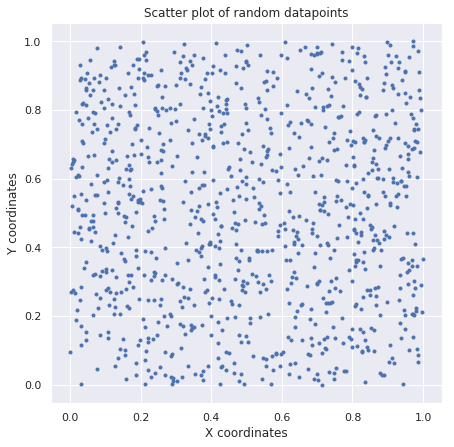

In [345]:
fig_RandomScatter = plt.figure(figsize=(7,7))
ax_RandomScatter = fig_RandomScatter.add_subplot(111)

ax_RandomScatter.scatter(DataPointArray[:,0], DataPointArray[:,1], marker = '.')
ax_RandomScatter.set_xlabel("X coordinates")
ax_RandomScatter.set_ylabel("Y coordinates")
ax_RandomScatter.set_title("Scatter plot of random datapoints")

plt.grid(0.1)

plt.show()

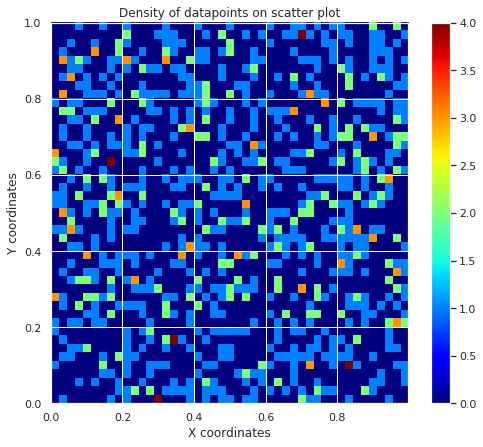

In [346]:
fig_RandomDensity = plt.figure(figsize=(8,7))
ax_RandomDensity = fig_RandomDensity.add_subplot(111)

RandomDensityPlotted = ax_RandomDensity.hist2d(DataPointArray[:,0], DataPointArray[:,1], (45, 45), cmap=plt.cm.jet)
ax_RandomDensity.set_xlabel("X coordinates")
ax_RandomDensity.set_ylabel("Y coordinates")
ax_RandomDensity.set_title("Density of datapoints on scatter plot")

plt.colorbar(RandomDensityPlotted[3], ax=ax_RandomDensity)

plt.show()

### Seaborn library

In [347]:
# Load data to Pandas DataFrame
df = pd.DataFrame({"x": DataPointArray[:,0], "y": DataPointArray[:,1]})

###### Write to CSV

In [348]:
# Save submission (no index column)
df.to_csv("Task4_scatterplot.csv", index=False, mode='w+')

##### Seaborn scatterplot

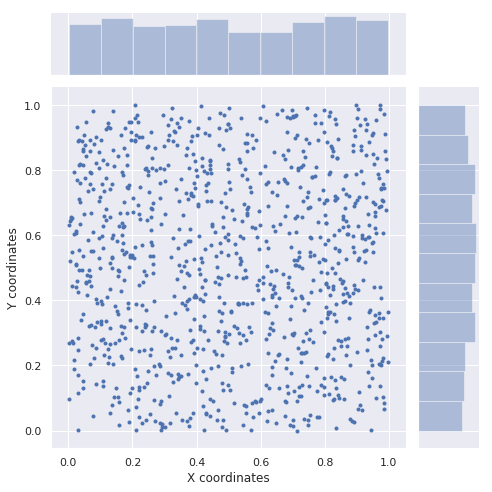

In [349]:
sns.jointplot(x="x", y="y", data=df, height=7, marker = '.').set_axis_labels("X coordinates", "Y coordinates")

##### Seaborn kernel density estimation

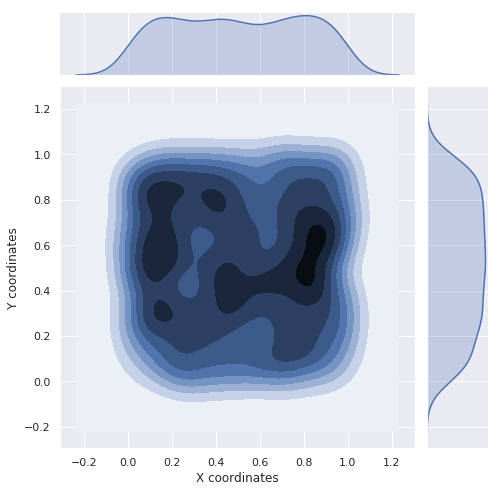

In [350]:
sns.jointplot(x="x", y="y", data=df, height=7, kind="kde").set_axis_labels("X coordinates", "Y coordinates")

##### Seaborn deep contour level

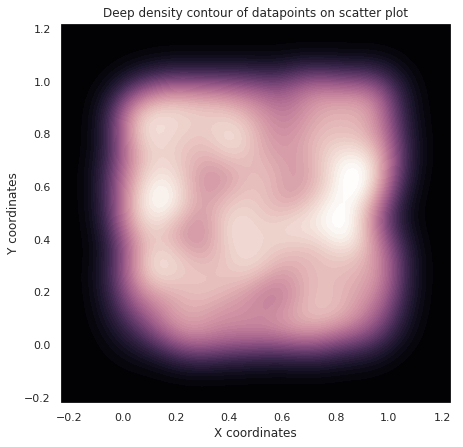

In [351]:
fig_RandomDeepContour = plt.figure(figsize=(7,7))
ax_RandomDeepContour = fig_RandomDeepContour.add_subplot(111)

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

ax_RandomDeepContour.set_title("Deep density contour of datapoints on scatter plot")
ax_RandomDeepContour.set_xlabel("X coordinates")
ax_RandomDeepContour.set_ylabel("Y coordinates")

plt.show()

#### Search for the closeset neighbour of every nodes

In [352]:
# Find distance between two choosen node
def DistanceBetweenNodes(node1, node2):
    return(np.linalg.norm(node2 - node1))

# Run through nodes and store distance values in an np.array
ClosesNeighbourDistances = np.empty(NbOfPoints)

def ClosestNeighbour(DataPointArray):
    # Run through points
    for i in range(0,NbOfPoints):
        # Indicating distance to closes neighbour from i-th element
        ActualDistance = 1

        # Measure distance to another point from the first one
        for j in range(0,NbOfPoints):
            
            if(i != j):
                # Calculate distance between i-th and j-th point
                ActualDistanceTemp = DistanceBetweenNodes(DataPointArray[i], DataPointArray[j])

                # Change value of smallest known distance, if the measured one is smaller, than the actually known one
                if(ActualDistanceTemp < ActualDistance):
                    ActualDistance = ActualDistanceTemp

        # At the end of the loop, add smallest known distance to the ClosesNeighbourDistances array
        ClosesNeighbourDistances[i] = ActualDistance

In [353]:
ClosestNeighbour(DataPointArray)

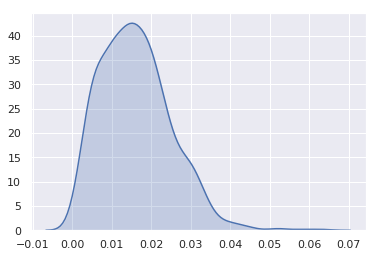

In [354]:
sns.kdeplot(ClosesNeighbourDistances, shade=True)

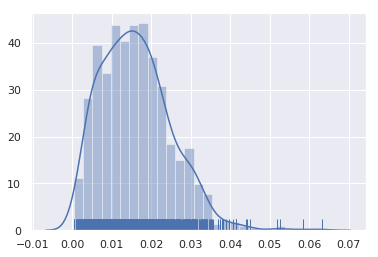

In [480]:
sns.distplot(ClosesNeighbourDistances, hist=True, rug=True)

## Task 5
### Floating-point arithmetic

##### Representaion

We can represent floating point numbers as follows:

$$
\hat{z} = \underbrace{\pm d_{0}, d_{1}, d_{2}, \cdots d_{p-1}}_\text{Mantis/Significand} \times {\underbrace{\beta}_\text{Base}}^{\overbrace{e}^\text{exp}} = \pm \left( \sum^{p-1}_{i=0}  d_{i} \beta^{-i} \right) \beta^{e}
$$

where, $p$ is the precision, $i$ is the position of the bit of the significand from the left (starting at 0), $e$ is the exponent, and $0 \leq d_{i} \leq \beta$.

Two other parameters associated with floating-point representations are the largest and smallest allowable exponents, $e_{min}$ and $e_{max}$. Since there are $\beta^{p}$ possible significands, and $e_{max} - e_{min} + 1$ possible exponents, a floating-point number can be encoded in

$$
1 + \log_2(e_{max} - e_{min} + 1) + \log_2(\beta^{p})
$$

bits, where the first $1 +$ is for the sign bit.

##### Precision

Machine precision is a quantity that characterizes the accuracy of a floating-point system, and is used in backward error analysis of floating-point algorithms. It is also known as unit roundoff or machine epsilon. Usually denoted $Ε_{mach}$, its value depends on the particular rounding being used.

With rounding to zero

$$
Ε_{mach} = \beta^{1-p}
$$

whereas rounding to nearest,

$$
Ε_{mach} = \frac{1}{2} \beta^{1-p}
$$

This is important since it bounds the relative error in representing any non-zero real number x within the normalized range of a floating-point system.

To compute the relative error that corresponds to .5 ULP (unit in the last place or unit of least precision), observe that when a real number is approximated by the closest possible floating-point number

$$
d,d,d \cdots d,d \times \beta^{e}
$$

the error can be as large as 

$$
0,0,0 \cdots 0,0 \times \beta' \times \beta^{e}
$$

where $\beta'$ is the digit $\frac{\beta}{2}$, there are $p$ units in the significand of the floating-point number, and $p$ units of $0$ in the significand of the error. This error is

$$
\left( \left( \frac{\beta}{2} \right) \times \beta^{-p} \right) \times \beta^{e} = \frac{1}{2} \beta^{1-p} \times \beta^{e}
$$

Since numbers of the form 

$$
d,d,d \cdots d,d \times \beta^{e}
$$ 

all have the same absolute error, but have values that range between $\beta^{e}$ and $\beta \times \beta^{e}$, the relative error ranges between 

$$
\left( \left( \frac{\beta}{2} \right) \times \beta^{-p} \right) \times \frac{\beta^{e}}{\beta^{e + 1}} = \frac{1}{2} \beta^{-p}
$$

and

$$
\left( \left( \frac{\beta}{2} \right) \times \beta^{-p} \right) \times \frac{\beta^{e}}{\beta^{e}} = \frac{1}{2} \beta^{1-p}
$$

That is

$$
\frac{1}{2} \beta^{-p} \leq \Delta \leq \frac{1}{2} \beta^{1-p}
$$

Setting the relative error

$$
\varepsilon = \frac{1}{2} \beta^{1-p}
$$

to the largest of the bounds like above, we can say that when a real number is rounded to the closest floating-point number, the relative error is always bounded by $\varepsilon$, which is referred to as machine epsilon.

The $\Delta$ absolute error of a quantity $\hat{z}$ could be calculated using the $\varepsilon$ relative error as follows:

$$
\Delta = \varepsilon \times \hat{z}
$$

In [63]:
StartNum = -3*math.sqrt(7)

##### Display a number in scientific notation

In [465]:
def SciNotationFormat_FPA(n):
    a = '%E' % n
    return(a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1])

In [466]:
print("Simple notation:", StartNum)
print("Scientific (normal) notation:", SciNotationFormat_FPA(StartNum))

Simple notation: -7.937253933193772
Scientific (normal) notation: -7.937254E+00


#### Calculating relative and absolute errors

The arrays if the form of b_p_X contains two quantities, $\beta$ and $p$ in the order of $\left( \beta,p \right)$. We use these vectors to calculate errors, using the method described above.


In [467]:
def CalcEpsRel_FPA(beta,p):
    return(1/2 * (1/beta**(abs(1-p))))

##### First variaton

In [468]:
b_p_1 = np.array((10,2))

In [469]:
epsilonRel_1 = CalcEpsRel_FPA(b_p_1[0],b_p_1[1])
print("Relative error in the first case:", epsilonRel_1)

Relative error in the first case: 0.05


In [470]:
deltaAbs_1 = abs(epsilonRel_1 * StartNum)
print("Absolute error in the first case:", deltaAbs_1)

Absolute error in the first case: 0.39686269665968865


##### Second variaton

In [471]:
b_p_2 = np.array((16,4))

In [472]:
epsilonRel_2 = CalcEpsRel_FPA(b_p_2[0],b_p_2[1])
print("Relative error in the second case:", epsilonRel_2)

Relative error in the second case: 0.0001220703125


In [473]:
deltaAbs_2 = abs(epsilonRel_2 * StartNum)
print("Absolute error in the second case:", deltaAbs_2)

Absolute error in the second case: 0.0009689030680168179


## Task 6
### Calculating the roots of a quadratic equation

#### Cancellation
Without a guard digit (see Task 3), the relative error committed when subtracting two nearby quantities can be very large. In other words, the evaluation of any expression containing a subtraction (or an addition of quantities with opposite signs) could result in a relative error so large that all the digits are meaningless. When subtracting nearby quantities, the most significant digits in the operands match and cancel each other. There are two kinds of cancellation: catastrophic and benign.

*Catastrophic cancellation* occurs when the operands are subject to rounding errors. For example in the quadratic formula, the expression 

$$
b^{2} - 4ac
$$

occurs. The quantities $b^{2}$ and $4ac$ are subject to rounding errors since they are the results of floating-point multiplications. Suppose that they are rounded to the nearest floating-point number, and so are accurate to within .5 ULP (see Task 5). When they are subtracted, cancellation can cause many of the accurate digits to disappear, leaving behind mainly digits contaminated by rounding error. Hence the difference might have an error of many ULPs. For example, consider 

$$
a = 1.22
$$
$$
b = 3.34
$$
$$
c = 2.28
$$

The exact value of $b^{2} - 4ac$ is $0.0292$. But $b^{2}$ rounds to $11.2$ and $4ac$ rounds to $11.1$, hence the final answer is $0.1$ which is an error by 70 ULPs, even though $11.2 - 11.1$ is exactly equal to $0.16$. The subtraction did not introduce any error, but rather exposed the error introduced in the earlier multiplications.

*Benign cancellation* occurs when subtracting exactly known quantities. If x and y have no rounding error, then if the subtraction is done with a guard digit, the difference $x - y$ has a very small relative error (less than 2).

A formula that exhibits catastrophic cancellation can sometimes be rearranged to eliminate the problem. Consider the quadratic formula (First formula):

$$
r_{1} = \frac{-b + \sqrt{b^{2} - 4ac}}{2a}
$$
$$
r_{2} = \frac{-b - \sqrt{b^{2} - 4ac}}{2a}
$$

When $b^{2} \gg ac$, then $b^{2} - 4ac$ does not involve a cancellation and

$$
\sqrt{b^{2} - 4ac} \approx \left| b \right|
$$

But the other addition (subtraction) in one of the formulas will have a catastrophic cancellation. To avoid this, multiply the numerator and denominator of $r_{1}$ and $r_{2}$ by

$$
-b - \sqrt{b^{2} - 4ac}
$$

to obtain the Second formula:

$$
r_{1} = \frac{2c}{-b - \sqrt{b^{2} - 4ac}}
$$
$$
r_{2} = \frac{2c}{-b + \sqrt{b^{2} - 4ac}}
$$

If $b^{2} \gg ac$ and $b > 0$, then computing $r_{1}$ using the First formula will involve a cancellation. Therefore, use the Second formula for computing $r_{1}$ and the First formula for $r_{2}$. On the other hand, if $b < 0$, use the First formula for computing $r_{1}$ and the Second formula for $r_{2}$.


##### Initial variables

In [520]:
a_Quad = 1
b_Quad = -1e+08
c_Quad = 1

Write a function to calculate $r_{1}$ and $r_{2}$, wheter $b < 0$ or $b > 0$, using the two formula above.

In [563]:
def QuadSolver(a_Quad,b_Quad,c_Quad):
    
    if(b < 0):
        r_1_Quad = (-b_Quad + math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad)) / (2*a_Quad)
        r_2_Quad = (2*c_Quad) / (-b_Quad + math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad))
        
    else:
        r_1_Quad = (2*c_Quad) / (-b_Quad - math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad))
        r_2_Quad = (-b_Quad - math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad)) / (2*a_Quad)
        
    return(r_1_Quad,r_2_Quad)

In [564]:
r_1_Quad, r_2_Quad = QuadSolver(a_Quad,b_Quad,c_Quad)

print("Root #1:", r_1_Quad)
print("Root #2:", r_2_Quad)

Root #1: 134217728.0
Root #2: 7.450580596923828e-09


##### Check result

In [565]:
# Should be ~0
print("ax^2 + bx + c with root #1:", SmartAdd(SmartAdd(a_Quad * (r_1_Quad**2),b_Quad * r_1_Quad),c_Quad))
print("ax^2 + bx + c with root #2:", SmartAdd(SmartAdd(a_Quad * (r_2_Quad**2),b_Quad * r_2_Quad),c_Quad))

ax^2 + bx + c with root #1: 4592625709481985
ax^2 + bx + c with root #2: 0.25494194030761725551115123125783


In [566]:
math.sqrt(4592625709481985.0)/134217728.0

0.504917755983702

## Task 7
### Heron's formula

The algorithm for calculating a triangle's area is the well-known Heron's formula. It states that the area of a triangle whose sides have lengths $a$, $b$, and $c$ is

$$
A = \sqrt{s \left( s-a \right) \left( s-b \right) \left( s-c \right)}
$$

Heron's formula as given above is numerically unstable for triangles with a very small angle when using floating point arithmetic. A stable alternative involves arranging the lengths of the sides so that $a \geq b \geq c$ and computing:

$$
A = \frac{1}{4}\sqrt{ \left( a + \left( b + c \right) \right) \left( c − \left( a − b \right) \right) \left( c + \left( a − b \right) \right) \left( a + \left( b − c \right) \right)}
$$

Where

$$
s = \frac{a+b+c}{2}
$$

The brackets in the above formula are required in order to prevent numerical instability in the evaluation.

##### Set length of sides and $\left( \beta, p \right)$

In [218]:
Side_a = 9
Side_b = 4.53
Side_c = 4.53

b_p_Heron = np.array((10,3))

##### Calculate half-circumference

In [219]:
s_Heron = (Side_a + Side_b + Side_c) / 2

print("Half-circumference", s_Heron)

Half-circumference 9.030000000000001


##### Compare the two implementations of Heron's formula

In [220]:
A_1 = math.sqrt(s_Heron * (s_Heron - Side_a) * (s_Heron - Side_b) * (s_Heron - Side_c))

In [221]:
A_2 = 1/4 * math.sqrt((Side_a + (Side_b + Side_c)) * (Side_c - (Side_a - Side_b)) * (Side_c + (Side_a - Side_b)) * (Side_a + (Side_b - Side_c)))

In [225]:
print("Heron Standard:", A_1)
print("Heron Numerically corrected:", A_2)

print("\nDifference:", abs(A_2 - A_1))

Heron Standard: 2.3421624623412036
Heron Numerically corrected: 2.3421624623411685

Difference: 3.5083047578154947e-14


#### Calculating relative and absolute errors

The arrays if the form of b_p_X contains two quantities, $\beta$ and $p$ in the order of $\left( \beta,p \right)$. We use these vectors to calculate errors, using the method described in Task 5.

In [387]:
def CalcEpsRel_Heron(beta,p):
    return(1/2 * (1/beta**(abs(1-p))))

In [393]:
# Initial b_p_X
b_p_Heron = np.array((10,3))

The relative errors are always the same, because they're only depend from $\left( \beta,p \right)$

In [394]:
epsilonRel_Heron = CalcEpsRel_Heron(b_p_Heron[0],b_p_Heron[1])
print("Relative error:", epsilonRel_Heron)

Relative error: 0.005


##### First case

In [395]:
deltaAbs_Heron_1 = epsilonRel_Heron * A_1
print("Absolute error in the first case:", deltaAbs_Heron_1)

Absolute error in the first case: 0.011710812311706018


##### Second case

In [396]:
deltaAbs_Heron_2 = epsilonRel_Heron * A_2
print("Absolute error in the first case:", deltaAbs_Heron_2)

Absolute error in the first case: 0.011710812311705843


##### Difference

In [397]:
print("Difference between errors:", abs(deltaAbs_Heron_2 - deltaAbs_Heron_1))

Difference between errors: 1.7520707107365752e-16


## Task 8
### Machine epsilon

### Octave

### Python

In [72]:
print("float epsilon:", np.finfo(float).eps)

print("np.float32 epsilon:", np.finfo(np.float32).eps)

print("np.float64 epsilon:", np.finfo(np.float64).eps)

float epsilon: 2.220446049250313e-16
np.float32 epsilon: 1.1920929e-07
np.float64 epsilon: 2.220446049250313e-16


## Task 9
### Random number generator with shift-register and XOR

## Task 10
### Multiplicative congruential random number generator

Multiplicative congruential pseudo-random number generator, generates numbers by a recursive equation, containing 3 parameters and 1 variable, as follows:

$$
x_{i+1} = \left( a*x_{i} + b \right)\ mod\ m
$$



In [73]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [74]:
#from mayavi import mlab

##### Initial variables

In [75]:
a = 13
b = 0
m = 150
x_0 = 1

##### Generating numbers in the $\left[ 0,1 \right]$ interval

In [76]:
def MultCongRNG(a,b,m,x_0):
    x_p = ((a * x_0 + b) % m) / m
    x_0 = x_p * m

    return(x_0, x_p)

In [77]:
x_0, RndNum = MultCongRNG(a,b,m,x_0)
print("Generated random number:", RndNum)

Generated random number: 0.08666666666666667


### Marsaglia's theorem/Marsaglia effect

The Marsaglia effect encapsulates the regularity, appearing in the numbers as pseudo-random numbers are generated. It was named after its descriptor, Marsaglira.
Marsaglia has shown that n-dimensional vectors, which were created by a pseudo-random generator will be located on a finite number of parallel n-dimensional surfaces, when they're represented.

To show the Marsaglia effect, we create thousands of 3-dimensional vectors, as follows:

$$
\left( x_{0}, x_{1}, x_{3} \right), \left( x_{4}, x_{5}, x_{6} \right), \left( x_{7}, x_{8}, x_{9} \right) \cdots
$$

Then we plot them on a cluster density graph, and a 2D scatter plot for demonstration.

In [78]:
DimOfMarsaglia = int(input("Please enter the dimension of examined vectors: ") or "3")

Please enter the dimension of examined vectors: 3


In [80]:
NbOfMarsaglia = int(input("Please enter the number of examined vectors: ") or "15000")

Please enter the number of examined vectors: 15000


In [81]:
MarsagliaArray = np.empty((NbOfMarsaglia, 3))

In [82]:
for i in range (NbOfMarsaglia):
    for j in range(DimOfMarsaglia):
        x_0, MarsagliaArray[i,j] = MultCongRNG(a,b,m,x_0)

In [83]:
print("Preview of the created array:\n", MarsagliaArray)

Preview of the created array:
 [[0.12666667 0.64666667 0.40666667]
 [0.28666667 0.72666667 0.44666667]
 [0.80666667 0.48666667 0.32666666]
 ...
 [0.44458957 0.77966441 0.13563733]
 [0.76328526 0.92270842 0.99520952]
 [0.93772382 0.1904097  0.47532609]]


##### 3D Scatter plot

Text(0.5,0,'Z coordinates')

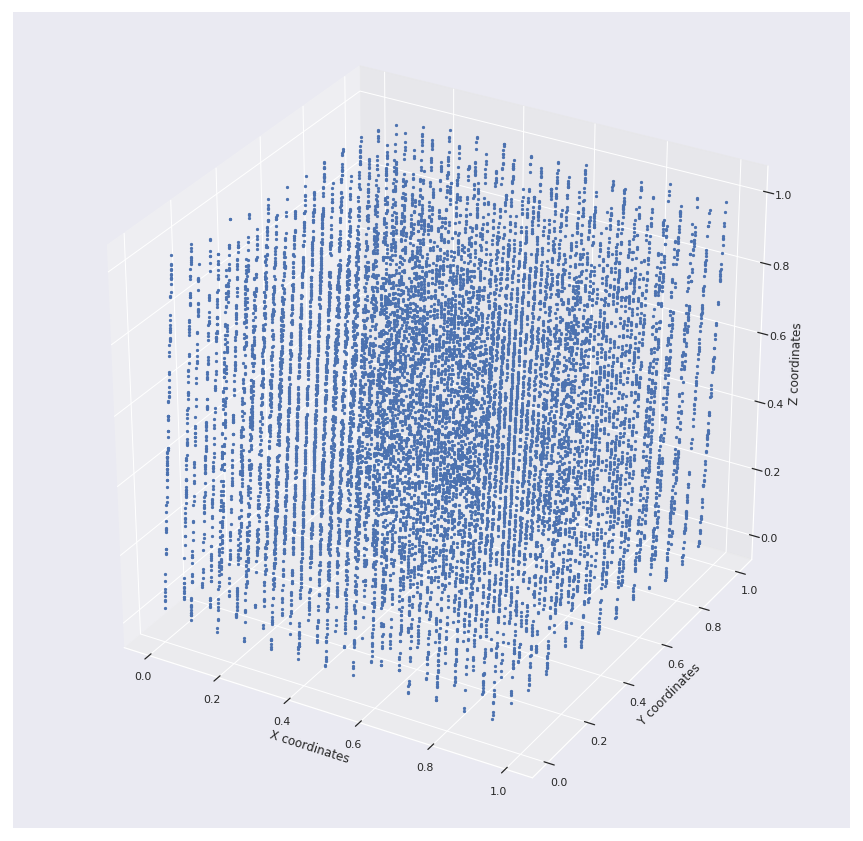

In [476]:
fig_MarsagliaScatter = plt.figure(figsize=(15,15))
ax_MarsagliaScatter = fig_MarsagliaScatter.add_subplot(111, projection='3d')

ax_MarsagliaScatter.scatter(xs=MarsagliaArray.T[0], ys=MarsagliaArray.T[1], zs=MarsagliaArray.T[2], zdir='z', s=20, c=None, depthshade=False, marker='.')
ax_MarsagliaScatter.set_xlabel("X coordinates")
ax_MarsagliaScatter.set_ylabel("Y coordinates")
ax_MarsagliaScatter.set_zlabel("Z coordinates")

It is clearly visible, that "random numbers fall mainly in the planes", as Marsaglia said!

#### Initial calculations for density plots

In [278]:
x_MarsagliaDensity = MarsagliaArray.T[0]
y_MarsagliaDensity = MarsagliaArray.T[1]
z_MarsagliaDensity = MarsagliaArray.T[2]

xyz_MarsagliaDensity = np.vstack([x_MarsagliaDensity,y_MarsagliaDensity,z_MarsagliaDensity])
density_MarsagliaDensity = stats.gaussian_kde(xyz_MarsagliaDensity)(xyz_MarsagliaDensity)

idx = density.argsort()
x_MarsagliaDensity, y_MarsagliaDensity, z_MarsagliaDensity, density_MarsagliaDensity = x_MarsagliaDensity[idx], y_MarsagliaDensity[idx], z_MarsagliaDensity[idx], density_MarsagliaDensity[idx]

##### 3D density plot

In [279]:
# Plot scatter with mayavi

#figure = mlab.figure('DensityPlot')
#pts = mlab.points3d(x_Mars, y_Mars, z_Mars, density, scale_mode='none', scale_factor=0.07)
#mlab.axes()
#mlab.show()

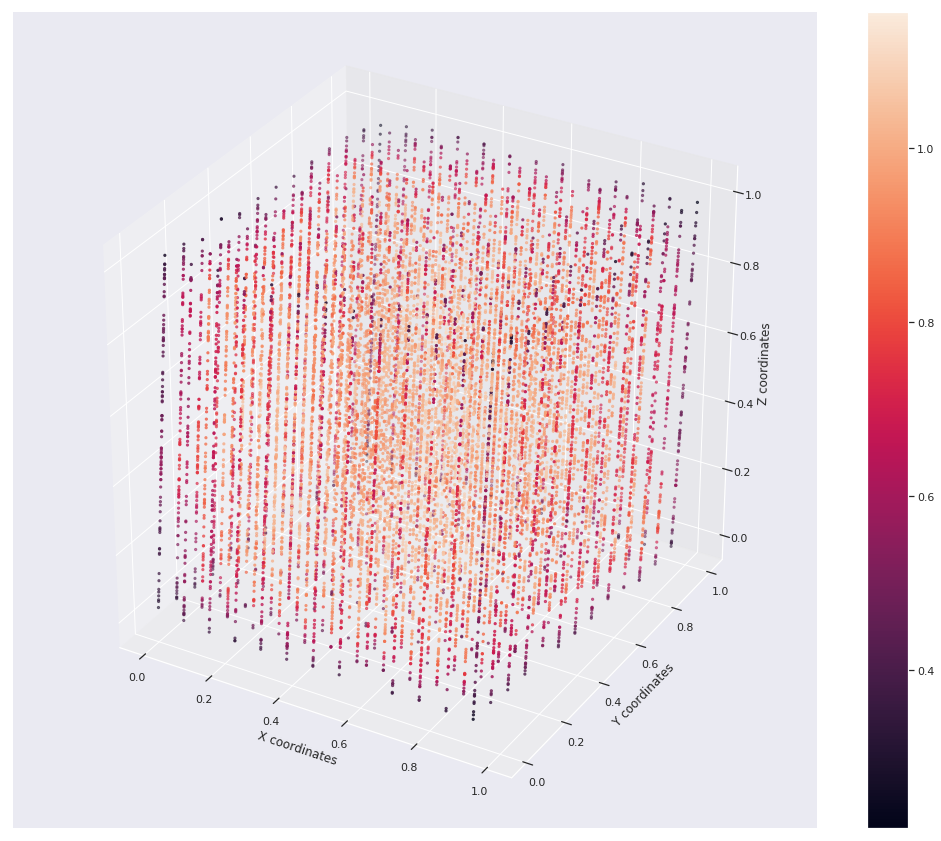

In [477]:
fig_MarsagliaDensity = plt.figure(figsize=(18,15))
ax_MarsagliaDensity = fig_MarsagliaDensity.add_subplot(111, projection='3d')

PlottedMarsagliaContour = ax_MarsagliaDensity.scatter(x_MarsagliaDensity, y_MarsagliaDensity, z_MarsagliaDensity, c=density_MarsagliaDensity, marker='.')
ax_MarsagliaDensity.set_xlabel('X coordinates')
ax_MarsagliaDensity.set_ylabel('Y coordinates')
ax_MarsagliaDensity.set_zlabel('Z coordinates')

fig_MarsagliaDensity.colorbar(PlottedMarsagliaContour)

#### 2D scatter along axises

Text(0.5,1,'Points along X-Z coordinates')

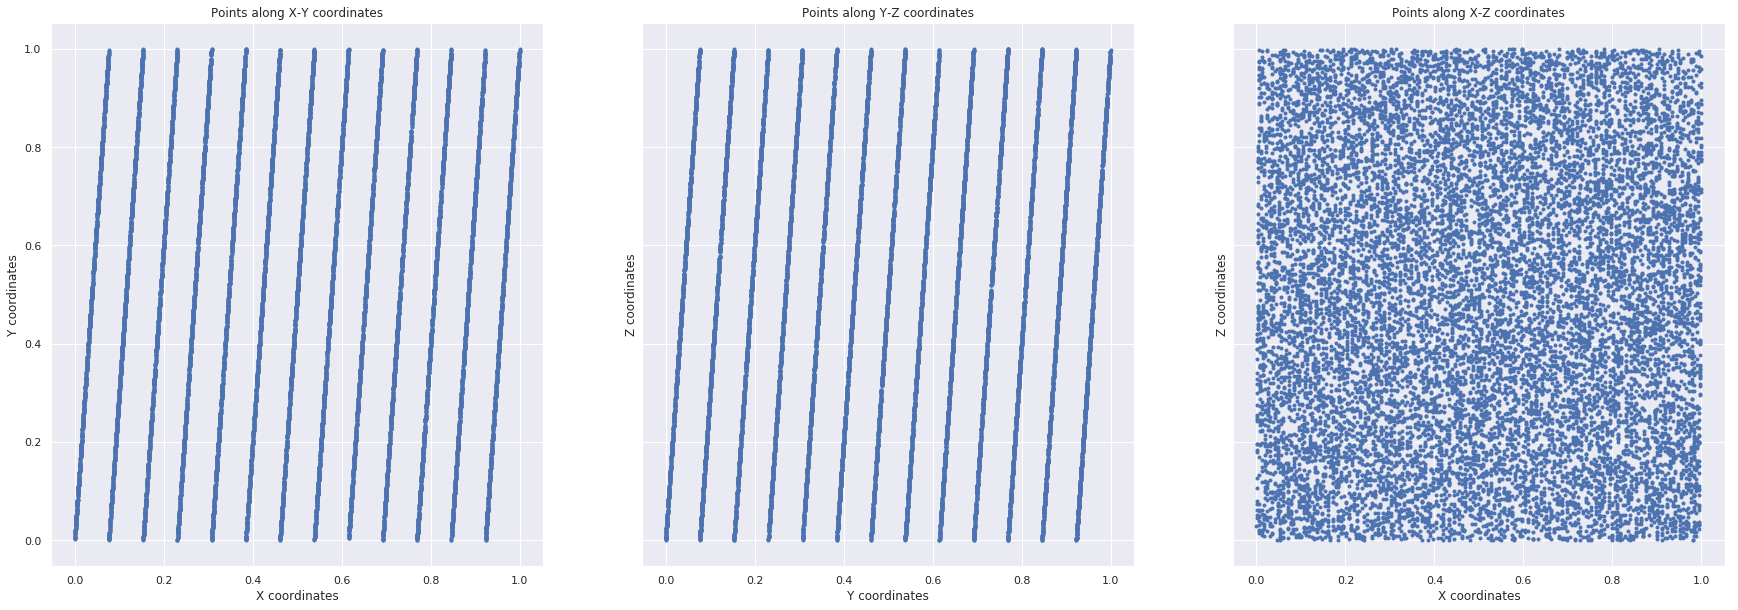

In [464]:
fig_RandomDeepContour = plt.figure(figsize=(30,10))
ax_MarsagliaContour_XY, ax_MarsagliaContour_YZ, ax_MarsagliaContour_XZ = fig_RandomDeepContour.subplots(1, 3, sharey=True)

ax_MarsagliaContour_XY.scatter(MarsagliaArray.T[0], MarsagliaArray.T[1], marker='.')
ax_MarsagliaContour_YZ.scatter(MarsagliaArray.T[1], MarsagliaArray.T[2], marker='.')
ax_MarsagliaContour_XZ.scatter(MarsagliaArray.T[0], MarsagliaArray.T[2], marker='.')

ax_MarsagliaContour_XY.set_xlabel("X coordinates")
ax_MarsagliaContour_XY.set_ylabel("Y coordinates")
ax_MarsagliaContour_XY.set_title("Points along X-Y coordinates")

ax_MarsagliaContour_YZ.set_xlabel("Y coordinates")
ax_MarsagliaContour_YZ.set_ylabel("Z coordinates")
ax_MarsagliaContour_YZ.set_title("Points along Y-Z coordinates")

ax_MarsagliaContour_XZ.set_xlabel("X coordinates")
ax_MarsagliaContour_XZ.set_ylabel("Z coordinates")
ax_MarsagliaContour_XZ.set_title("Points along X-Z coordinates")